In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math


# Keeping the random data the same over multiple runs of the code
np.random.seed(42)

# Storing our randomly generated data and labels.
data = []
groups = []
labels_var = []
labels_size = []

# The values we use for the standard deviations and the sample sizes.
variability = [5, 20, 50]
sizes = [10, 100, 10000]

# Generating data for each group for each combination of variability and 
# sample size.
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(20,var,size))
        data.extend(np.random.normal(35,var,size))
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)

In [17]:
# Putting the data together in a data frame and checking it.

data = pd.DataFrame({'data': data, 
                    'groups': groups,
                    'variability': labels_var,
                    'size': labels_size})
print(data.head())

        data  groups  variability  size
0  22.483571  group1            5    10
1  19.308678  group1            5    10
2  23.238443  group1            5    10
3  27.615149  group1            5    10
4  18.829233  group1            5    10


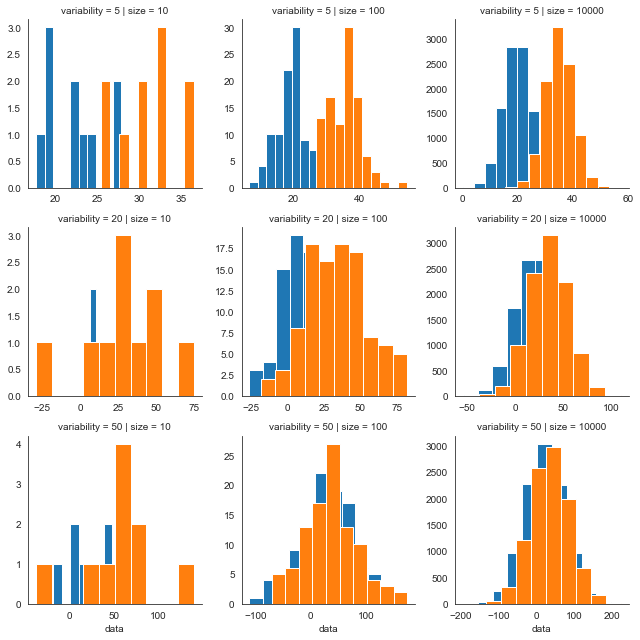

In [18]:
# Plotting the data.  
# Because we organized the data frame in a stacked (long) format,
# the plotting code is very straightforward.

sns.set_style('white')

g = sns.FacetGrid(data, col='size', row='variability', hue='groups', sharex=False, sharey=False)
g.map(plt.hist, 'data')
plt.show()

In [19]:
# Calculating the t-test
# Setting the three non-data columns to work as multi-indices.
# This makes it much easier to get subsections of stacked data.

data_test = data.set_index(['groups', 'size', 'variability'])

# Storing our t-values and p-values.
tvalues = []
pvalues = []

# For each combination of sample size and varibability, compare the two gruops using a t-test.
for size in sizes:
    for var in variability: 
        a = data_test['data'].xs(('group1', size, var), level=('groups', 'size', 'variability'))
        b = data_test['data'].xs(('group2', size, var), level=('groups', 'size', 'variability'))
        tval, pval = stats.ttest_ind(b, a, equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)

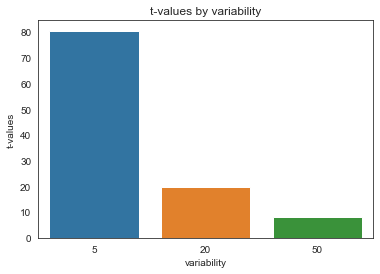

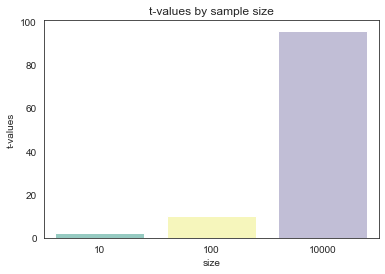

[5.326813913989545, 0.5724494997372598, 1.426502710224362, 23.48984514816914, 5.531061026476706, 1.545026734692786, 212.5934733088623, 53.27638849611689, 21.222611792947895]


In [21]:
# Creating a data frame for plotting purposes
tvalues_plot = pd.DataFrame({'t': tvalues,
                            'p': pvalues,
                            'variability': variability*3,
                            'size': np.repeat(sizes, 3)})

# t-values by variability
ax = sns.barplot(y='t', x='variability', ci=None, data=tvalues_plot)
ax.set(ylabel='t-values', title='t-values by variability')
plt.show()

# t-values by sample size

ax = sns.barplot(y='t', x='size', ci=None, data=tvalues_plot, palette='Set3')
ax.set(ylabel='t-values', title='t-values by sample size')
plt.show()


Without a t-test, we have no straightforward way to use our AB testing to get and the question: Are the groups different?
With a t-test we calculate the t-statistic, which gives us the size of the group difference divided by the noise level of the data. Bigger t-values signal a group difference large enough to be interesting to us. But what is a 'bigger' t-value? What is the probability of getting a t-value this extreme or more if there were no difference between the groups in the population? We can decide how improbably we need our t-value to be before we accept that there is a real difference between the two groups, known as the p-value. The threshold of improbability we choose is called a significance level.

1. 𝑦1¯=5 ,  𝑦2¯=8 ,  𝑠1=1 ,  𝑠2=3 ,  𝑁1=200 ,  𝑁2=500 <br>
2. 𝑦1¯=1090 ,  𝑦2¯=999 ,  𝑠1=400 ,  𝑠2=30 ,  𝑁1=900 ,  𝑁2=100  <br>
3. 𝑦1¯=45 ,  𝑦2¯=40 ,  𝑠1=45 ,  𝑠2=40 ,  𝑁1=2000 ,  𝑁2=2000 <br>


In [34]:
# 𝑦1¯=5 ,  𝑦2¯=8 ,  𝑠1=1 ,  𝑠2=3 ,  𝑁1=200 ,  𝑁2=500

t = (5-8)/math.sqrt((1**2/200)+(3**2/500))
print(t)
data1 = []
data2 = []

data1.extend(np.random.normal(5,1,200))
data2.extend(np.random.normal(8,3,500))
t_val = stats.ttest_ind(data1, data2, equal_var=True)
print(t_val)

-19.78141420187361
Ttest_indResult(statistic=-13.453107263507349, pvalue=7.524666091931973e-37)


In [35]:
# 𝑦1¯=1090 ,  𝑦2¯=999 ,  𝑠1=400 ,  𝑠2=30 ,  𝑁1=900 ,  𝑁2=100

t = (1090-999)/math.sqrt((400**2/900)+(30**2/100))
print(t)
data3 = []
data4 = []

data3.extend(np.random.normal(1090, 400, 900))
data4.extend(np.random.normal(999, 30, 100))
t_val = stats.ttest_ind(data3, data4, equal_var=True)
print(t_val)

6.658536585365854
Ttest_indResult(statistic=2.3538850639519393, pvalue=0.018771431912892142)


In [31]:
# 𝑦1¯=45 ,  𝑦2¯=40 ,  𝑠1=45 ,  𝑠2=40 ,  𝑁1=2000 ,  𝑁2=2000

t = (45-40)/math.sqrt((45**2/2000)+(40**2/2000))
print(t)
data5 = []
data6 = []

data5.extend(np.random.normal(45, 45, 2000))
data6.extend(np.random.normal(40, 40, 2000))

t_val = stats.ttest_ind(data5, data6, equal_var=True)
print(t_val)

3.7139067635410377
Ttest_indResult(statistic=3.8661439055138658, pvalue=0.00011232624568942029)


In [ ]:
use np.normal to create the data